In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('BTCUSD_2021.csv')

dataset_train['date'] = pd.to_datetime(dataset_train['date'], unit='s')

training_set = dataset_train.iloc[:, 1:2].values
dataset_train.head()

,date,low,high,open,close,volume
0,2021-01-01 00:00:00,28965.01,29015.49,28978.66,29015.49,1.030971
1,2021-01-01 00:01:00,29012.96,29050.52,29014.55,29049.52,2.104348
2,2021-01-01 00:02:00,29040.69,29050.52,29049.05,29040.69,0.141871
3,2021-01-01 00:03:00,29021.26,29041.70,29040.45,29040.57,0.039191
4,2021-01-01 00:04:00,29020.39,29040.57,29034.12,29031.48,1.927880


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

Using TensorFlow backend.


In [7]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1975/1975 [==============================] - 6s 3ms/step - loss: 9.3373e-05
Epoch 2/100
1975/1975 [==============================] - 5s 2ms/step - loss: 3.1635e-05
Epoch 3/100
1975/1975 [==============================] - 5s 2ms/step - loss: 1.8073e-05
Epoch 4/100
1975/1975 [==============================] - 5s 3ms/step - loss: 1.2348e-05
Epoch 5/100
1975/1975 [==============================] - 5s 2ms/step - loss: 1.1155e-05
Epoch 6/100
1975/1975 [==============================] - 5s 2ms/step - loss: 9.1277e-06
Epoch 7/100
1975/1975 [==============================] - 5s 2ms/step - loss: 9.8844e-06
Epoch 8/100
1975/1975 [==============================] - 5s 2ms/step - loss: 7.2919e-06
Epoch 9/100
1975/1975 [==============================] - 5s 2ms/step - loss: 7.5264e-06
Epoch 10/100
1975/1975 [==============================] - 5s 3ms/step - loss: 5.9993e-06
Epoch 11/100
1975/1975 [==============================] - 5s 3ms/step - loss: 5.5512e-06
Epoch 12/100
1975/1975 [======

In [8]:
dataset_test = pd.read_csv('BTCUSD_2021.csv')

dataset_train['date'] = pd.to_datetime(dataset_train['date'], unit='s')

real_bitcoin_price = dataset_test.iloc[:, 1:2].values

In [10]:
dataset_total = pd.concat((dataset_train['open'], dataset_test['open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_bitcoin_price = model.predict(X_test)
predicted_bitcoin_price = sc.inverse_transform(predicted_bitcoin_price)

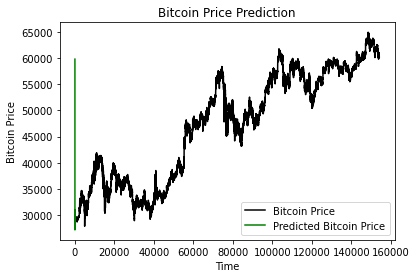

In [11]:
plt.plot(real_bitcoin_price, color = 'black', label = 'Bitcoin Price')
plt.plot(predicted_bitcoin_price, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()